In [42]:
#importing pandas library
import pandas as pd
#Reading file from PC - The directory is where my csv file containing the viewing acivity is located 
df = pd.read_csv('ViewingActivity.csv')

In [43]:
#stores number of rows and columbs as a tuple
df.shape

(19097, 10)

In [44]:
#dispaying number of rows and columns as tuple 
df.head(1)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Bee,2021-05-29 20:59:40,01:51:32,NaN,Nightcrawler,NaN,Chrome PC (Cadmium),01:52:53,01:52:53,IN (India)


In [45]:
#removing unwanted rows and columns
df = df.drop([ 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
df.head(1)


,Profile Name,Start Time,Duration,Title
0,Bee,2021-05-29 20:59:40,01:51:32,Nightcrawler


In [46]:
#changing the Start Time column to datetime format 
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Profile Name                 object
Start Time      datetime64[ns, UTC]
Duration                     object
Title                        object
dtype: object

In [47]:
#set_index will make the Start Time oour index
df = df.set_index('Start Time')
#converting the time to Indian time zone
df.index = df.index.tz_convert('Asia/Kolkata')
df = df.reset_index()
df.head(1)

,Start Time,Profile Name,Duration,Title
0,2021-05-30 02:29:40+05:30,Bee,01:51:32,Nightcrawler


In [48]:
#changing the format of Durtion to timedelta
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes


Start Time      datetime64[ns, Asia/Kolkata]
Profile Name                          object
Duration                     timedelta64[ns]
Title                                 object
dtype: object

In [49]:
#creating two new dataframes based on Profile Name:Sanjay and Title: Brooklyn
#variable sxed because initially I chose sex eduacation and later changed to brooklyn99
pronam = df[df['Profile Name'].str.contains('Sanjay', regex=False)]

sxed = pronam[pronam['Title'].str.contains('Brooklyn', regex=False)]
sxed.shape

(167, 4)

In [50]:
#Not considering the time when an episode is only played for less than a minute
sxed = sxed[(sxed['Duration'] > '0 days 00:01:00')]
sxed.shape

(154, 4)

In [51]:
#Total sum of duration
sxed['Duration'].sum()

Timedelta('1 days 16:56:33')

In [52]:
#Creating new columns weekday and hour, which contains which week the episode is played and which hour of the day it is played
sxed['weekday'] = sxed['Start Time'].dt.weekday
sxed['hour'] = sxed['Start Time'].dt.hour

sxed.head(1)


,Start Time,Profile Name,Duration,Title,weekday,hour
1361,2021-05-29 15:58:34+05:30,Sanjay,0 days 00:06:17,Brooklyn Nine-Nine: Season 6: The Crime Scene ...,5,15


In [53]:
#importing matplotlib library
%matplotlib inline
import matplotlib


<AxesSubplot:title={'center':'Broolyn99 Episodes Watched by Day'}>

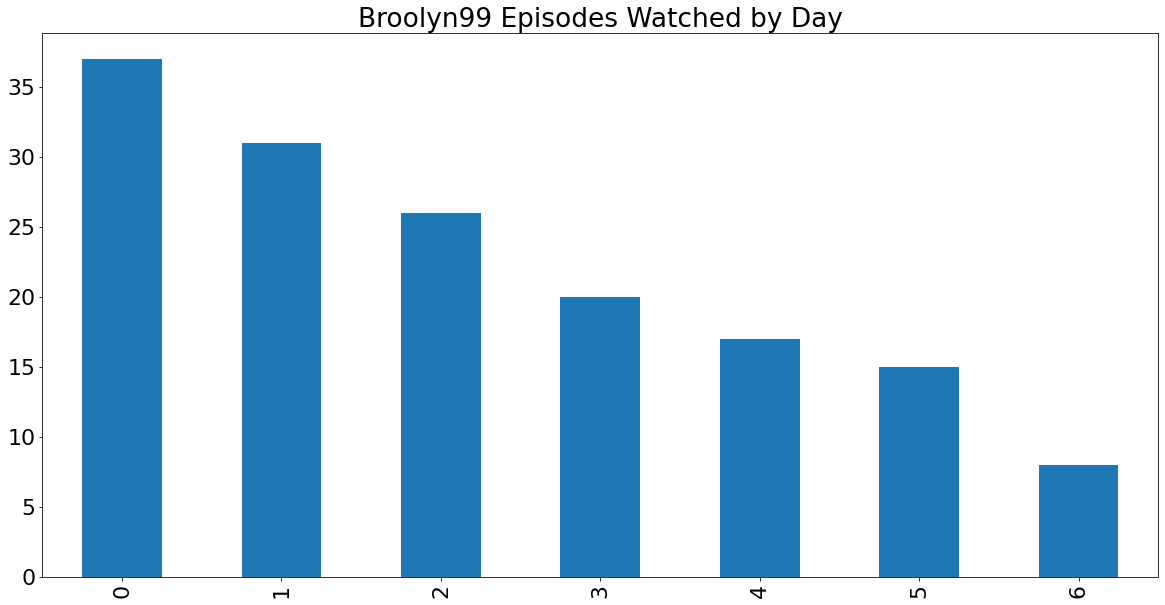

In [54]:
#weekday column value repeats from 0 to 6
#0 represents Sunday,... and 6 represents Saturday
#We count the total number of times an episode is played in each weekday and sort the data
sxed['weekday'] = pd.Categorical(sxed['weekday'], categories=[0,1,2,3,4,5,6], ordered=True)
sxed_by_day = sxed['weekday'].value_counts()
sxed_by_day = sxed_by_day.sort_index()
#setting the fontsize and plottig the data in a bar graph
matplotlib.rcParams.update({'font.size': 22})
sxed_by_day.plot(kind='bar', figsize=(20,10), title='Broolyn99 Episodes Watched by Day')


<AxesSubplot:title={'center':'Brooklyn99 Episodes watched by Hour'}>

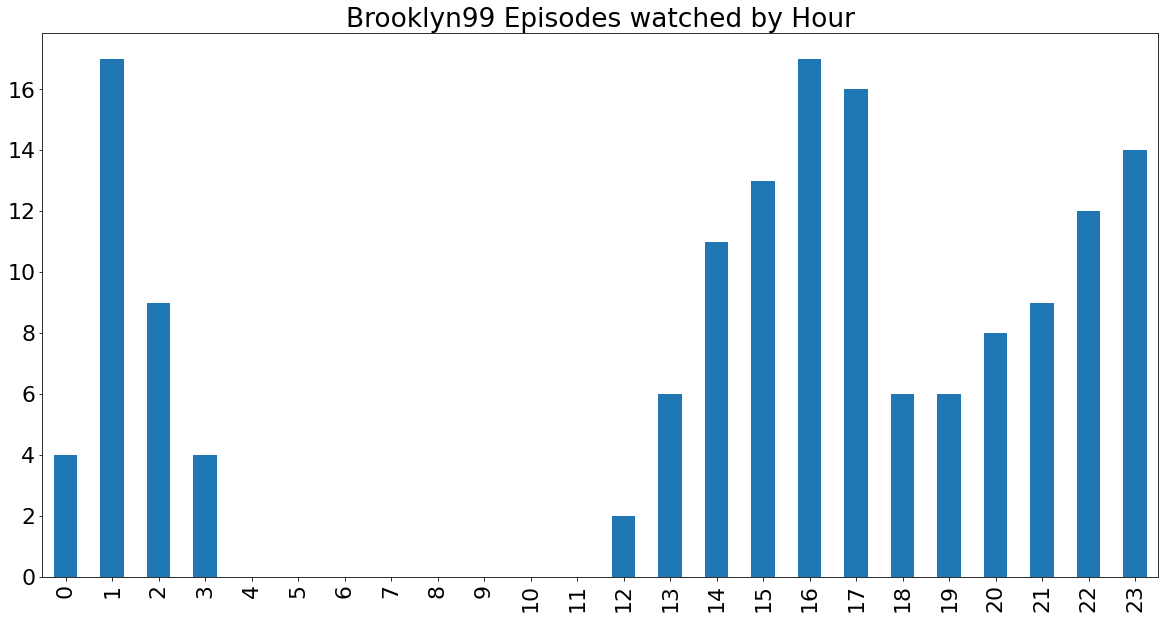

In [55]:
#Count the total number of times the series is played in each hour
#hours in 24 hours format
sxed['hour'] = pd.Categorical(sxed['hour'], categories= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],ordered=True)

sxed_by_hour = sxed['hour'].value_counts()
sxed_by_hour = sxed_by_hour.sort_index()

#plotting the data in bargraph
matplotlib.rcParams.update({'font.size':22})
sxed_by_hour.plot(kind='bar', figsize=(20,10), title = 'Brooklyn99 Episodes watched by Hour')

# Netflix Viewing Activity During Covid-19

In [56]:
#Covid Time Data Analyse
#dropping Title and Profile Name column from the table
covidData = df.drop(['Title','Profile Name'], axis=1)
covidData


,Start Time,Duration
0,2021-05-30 02:29:40+05:30,0 days 01:51:32
1,2021-05-30 02:29:14+05:30,0 days 00:00:17
2,2021-05-30 02:27:17+05:30,0 days 00:00:04
3,2021-05-30 02:24:49+05:30,0 days 00:00:51
4,2021-05-30 02:21:37+05:30,0 days 00:02:58
...,...,...
19092,2018-11-17 09:08:15+05:30,0 days 00:13:25
19093,2018-11-17 08:57:51+05:30,0 days 00:08:23
19094,2018-11-17 08:33:25+05:30,0 days 00:22:18
19095,2018-11-15 20:23:08+05:30,0 days 00:02:33


In [57]:
#Adding another column named Date to store date of the content played
covidData['Date'] = covidData['Start Time'].dt.date
covidData['Date'] = pd.to_datetime(covidData['Date'])

In [58]:
#Taking only the data from the covid-19 time, 2019 last to the present
start_date = '2019-12-01'
end_date = '2021-06-30'

covidTime = (covidData['Date'] > start_date) & (covidData['Date'] <= end_date)

covidData = covidData.loc[covidTime]
covidData

,Start Time,Duration,Date
0,2021-05-30 02:29:40+05:30,0 days 01:51:32,2021-05-30
1,2021-05-30 02:29:14+05:30,0 days 00:00:17,2021-05-30
2,2021-05-30 02:27:17+05:30,0 days 00:00:04,2021-05-30
3,2021-05-30 02:24:49+05:30,0 days 00:00:51,2021-05-30
4,2021-05-30 02:21:37+05:30,0 days 00:02:58,2021-05-30
...,...,...,...
18685,2020-03-31 23:04:59+05:30,0 days 00:57:39,2020-03-31
18686,2020-03-31 22:35:26+05:30,0 days 00:22:37,2020-03-31
18687,2020-03-31 22:25:11+05:30,0 days 00:02:22,2020-03-31
18688,2020-03-31 22:08:10+05:30,0 days 00:16:06,2020-03-31


In [59]:
#number of times the content is played in the covid-19 time
covidView = covidData.groupby(['Date']).size()
#just printing the first 10 ows
covidView.head(10)

Date
2020-02-11     5
2020-02-12     2
2020-02-13     1
2020-02-14     8
2020-02-15    20
2020-02-16     3
2020-02-17    11
2020-02-18    12
2020-02-19    10
2020-02-20     2
dtype: int64

<AxesSubplot:title={'center':'Viewing Activity During Covid Time'}, xlabel='Date'>

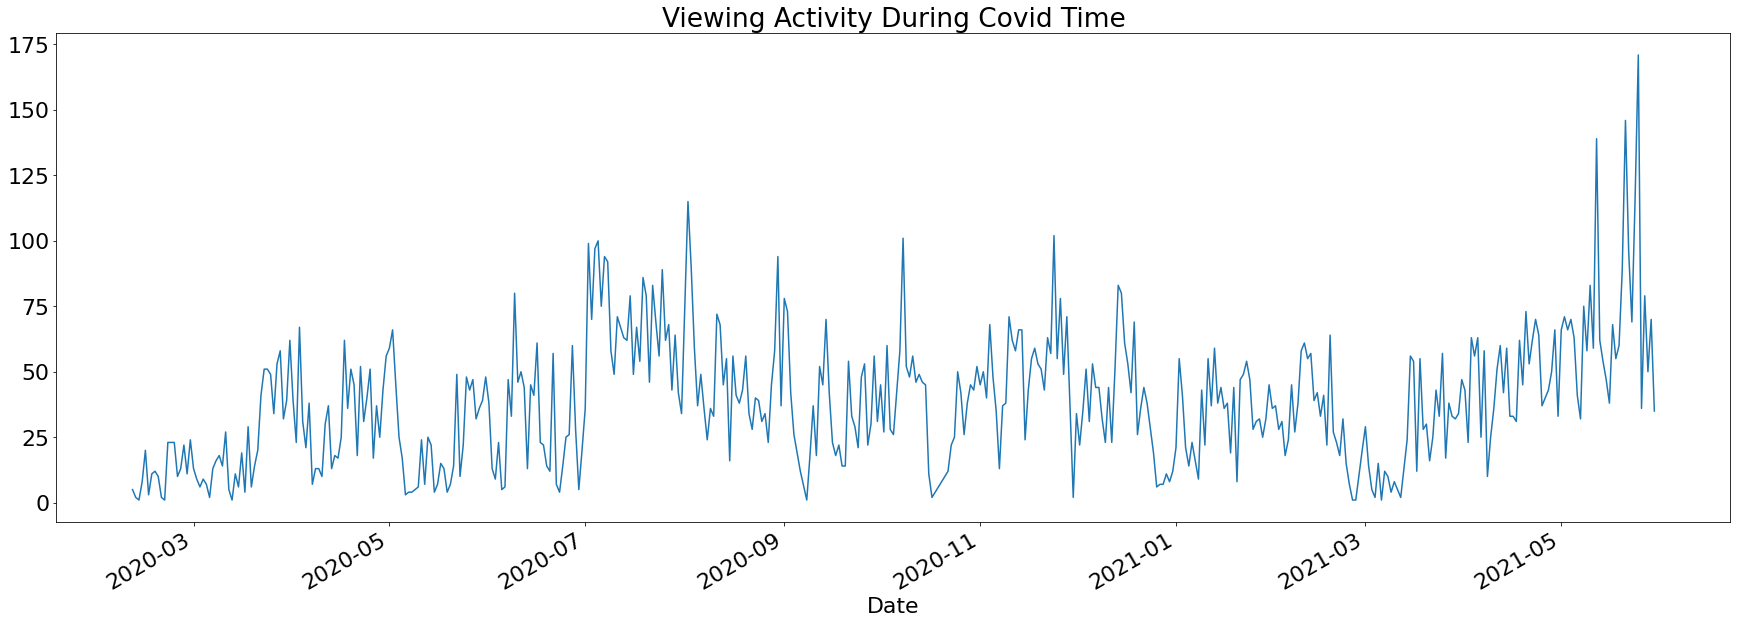

In [60]:
#Visualizing the Data
covidView.plot(figsize=(30,10), title='Viewing Activity During Covid Time')